2. [pažengęs duomenų analitikas]. Optimalus elektros kainos planas
Įsivaizduokime, kad 2020–2022 metais egzistavo trys elektros energijos kainos planai buitiniams
vartotojams:
"Minimalus": 1.00 Eur/mėn. + 0.22 Eur/kWh*
"Standartinis": 2.00 Eur/mėn. + 0.20 Eur/kWh*
"Lankstus": 3.00 Eur/mėn. + 0.08 Eur/kWh* + NordPool valandinė kaina už kWh**
* skaičiuojama susumavus viso mėnesio suvartotą el. energijos kiekį
** skaičiuojama kiekvienai valandai atskirai
Naudodamiesi duomenimis iš jaunesniųjų duomenų analitikų užduoties ir susiaurinę jų apimtį iki butų (71
objektas, laikotarpis nuo 2020-06-01 00:00:00 iki 2022-06-01 00:00:00), sukurkite iliustraciją,
vaizduojančią, koks kiekvienam butui buvo finansiškai palankiausias (pigiausias) kainos planas kiekvieną
mėnesį. Pavyzdys žemiau:

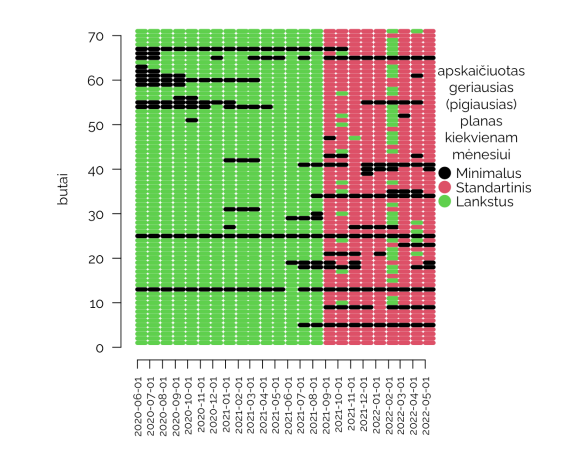

Nurodykite butą (objekto numerį), kuriam dažniausiai palankiausias buvo "Minimalus" planas.
Nurodykite butą (objekto numerį), kuriam dažniausiai palankiausias buvo "Lankstus" planas.

***********************  sprendimas  *****************************

In [ ]:
# Naudojamos bibliotekos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
# failo_kelias = r"C:\Users\Paulius\Duomenu mokslas\Duomenų analitikų užduotis\paruošti_duomenys.csv"

# duomenys = pd.read_csv(failo_kelias)

# filtruoti_duomenys = duomenys[duomenys['OBT_PAVADINIMAS'] == 'Butas']

# naujas_kelias = r"C:\Users\Paulius\Duomenu mokslas\Duomenų analitikų užduotis\filtruoti_duomenys.csv"

# filtruoti_duomenys.to_csv(naujas_kelias, index=False)

In [ ]:
#  Kaip atrodo pirmosios duomenų eilutės
naujas_kelias = r"C:\Users\Paulius\Duomenu mokslas\Duomenų analitikų užduotis\butu_duomenys.csv"
duomenys = pd.read_csv(naujas_kelias)
print(duomenys.head(5))

                    TINKLAS OBT_PAVADINIMAS OBJ_GV_TIPAS  OBJ_NUMERIS      P+  \
0   Alytaus regiono tinklas           Butas        Ne GV        37502  0.0500   
1  Vilniaus regiono tinklas           Butas        Ne GV       600022  0.0230   
2     Kauno regiono tinklas           Butas            N       197974  0.1058   
3  Vilniaus regiono tinklas           Butas        Ne GV       535458  0.0400   
4     Kauno regiono tinklas           Butas        Ne GV       193160  0.1340   

                  PL_T   P-  
0  2020-06-30 00:00:00  0.0  
1  2020-06-30 00:00:00  NaN  
2  2020-06-30 00:00:00  0.0  
3  2020-06-30 00:00:00  NaN  
4  2020-06-30 00:00:00  NaN  


In [ ]:
# Duomenų aprašomoji statistika
pd.options.display.float_format = '{:.2f}'.format
duomenu_aprasymas = duomenys.describe()
print(duomenu_aprasymas)

       OBJ_NUMERIS         P+        P-
count   1243920.00 1243920.00 280320.00
mean     517659.75       0.18      0.02
std      202377.20       0.26      0.19
min       37082.00       0.00      0.00
25%      535458.00       0.04      0.00
50%      596362.00       0.10      0.00
75%      627322.00       0.21      0.00
max      802602.00       5.49      3.99


In [ ]:
# Patikrinama ar gautas tinkamas unikalių būtų skaičius
filtruoti_duomenys = pd.read_csv(naujas_kelias)
unikaliu_butu_skaicius = filtruoti_duomenys['OBJ_NUMERIS'].nunique()
print(f"Skirtingų butų skaičius: {unikaliu_butu_skaicius}")

Skirtingų butų skaičius: 71


Norint paversti iš kilovatvalandžių (kWh) į megavatvalandes (MWh), reikia padalyti iš 1000.

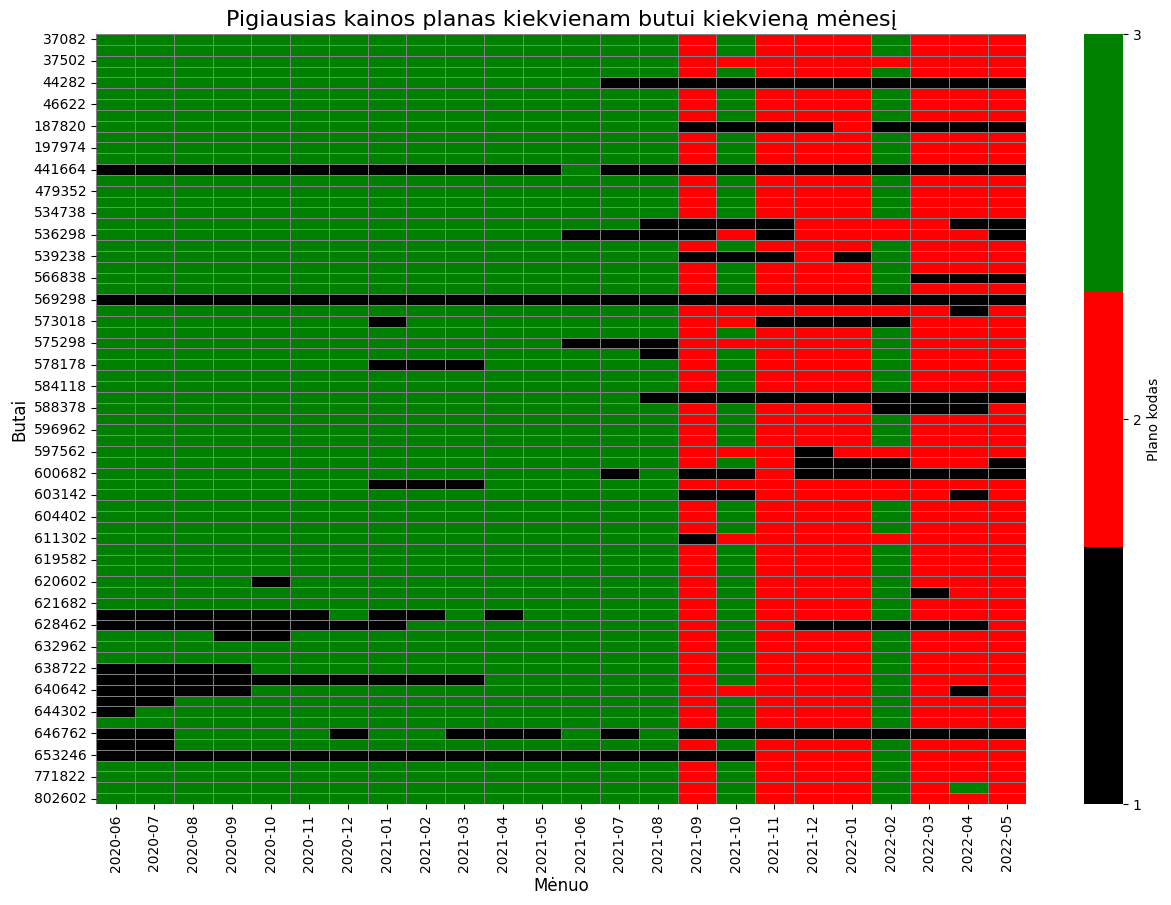

In [6]:
butu_failas = r"C:\Users\Paulius\Duomenu mokslas\Duomenų analitikų užduotis\butu_duomenys.csv"
nordpool_failas = r"C:\Users\Paulius\Duomenu mokslas\Duomenų analitikų užduotis\nordpool_duomenys.csv"

butu_duomenys = pd.read_csv(butu_failas)
nordpool_duomenys = pd.read_csv(nordpool_failas)

butu_duomenys['PL_T'] = pd.to_datetime(butu_duomenys['PL_T'])
nordpool_duomenys['Laikas'] = pd.to_datetime(nordpool_duomenys['Laikas'])

butu_duomenys['Mėnuo'] = butu_duomenys['PL_T'].dt.to_period('M')
nordpool_duomenys['Mėnuo'] = nordpool_duomenys['Laikas'].dt.to_period('M')

butu_duomenys = butu_duomenys[(butu_duomenys['PL_T'] >= '2020-06-01') & (butu_duomenys['PL_T'] < '2022-06-01')]
menesinis_suvartojimas = butu_duomenys.groupby(['OBJ_NUMERIS', 'Mėnuo'])['P+'].sum().reset_index()

vidutines_kainos = nordpool_duomenys.groupby('Mėnuo')['Kaina'].mean().reset_index()

menesinis_suvartojimas = pd.merge(menesinis_suvartojimas, vidutines_kainos, on='Mėnuo', how='left')

menesinis_suvartojimas['Minimalus'] = 1.00 + 0.22 * menesinis_suvartojimas['P+']
menesinis_suvartojimas['Standartinis'] = 2.00 + 0.20 * menesinis_suvartojimas['P+']
menesinis_suvartojimas['Lankstus'] = (
    3.00 + 0.08 * menesinis_suvartojimas['P+'] + 
    (menesinis_suvartojimas['Kaina'] / 1000) * menesinis_suvartojimas['P+']
)

menesinis_suvartojimas['Pigiausias_planas'] = menesinis_suvartojimas[['Minimalus', 'Standartinis', 'Lankstus']].idxmin(axis=1)

planu_kodai = {'Minimalus': 1, 'Standartinis': 2, 'Lankstus': 3}
menesinis_suvartojimas['Plano_kodas'] = menesinis_suvartojimas['Pigiausias_planas'].map(planu_kodai)

pivot_table = menesinis_suvartojimas.pivot_table(
    index='OBJ_NUMERIS',
    columns='Mėnuo',
    values='Plano_kodas' 
).fillna(0)

plt.figure(figsize=(15, 10))
sns.heatmap(
    pivot_table,
    cmap=sns.color_palette(["black", "red", "green"]), 
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={'ticks': [1, 2, 3], 'label': 'Plano kodas'}
)

plt.title("Pigiausias kainos planas kiekvienam butui kiekvieną mėnesį", fontsize=16)
plt.xlabel("Mėnuo", fontsize=12)
plt.ylabel("Butai", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
plt.show()

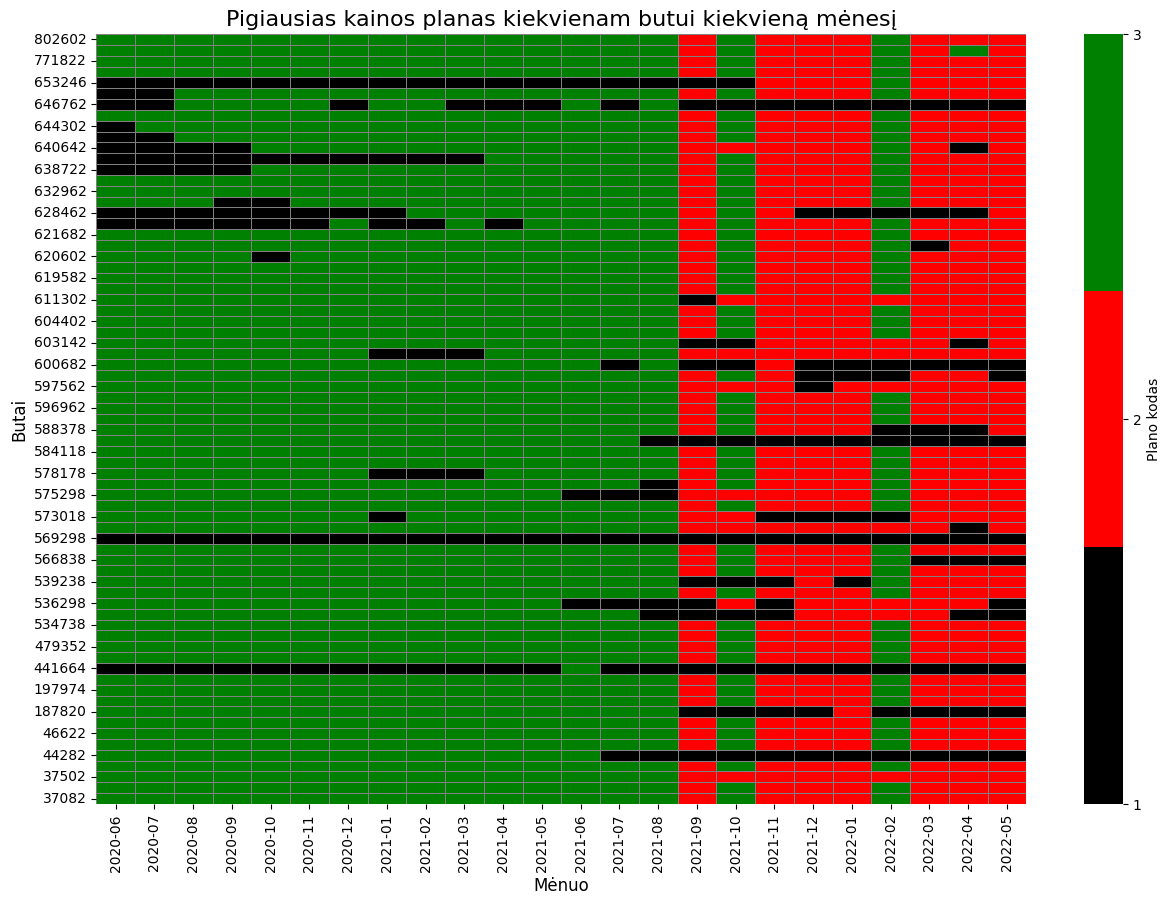

In [7]:
pivot_table = menesinis_suvartojimas.pivot_table(
    index='OBJ_NUMERIS',  
    columns='Mėnuo', 
    values='Plano_kodas'
).fillna(0)

pivot_table = pivot_table.iloc[::-1]

plt.figure(figsize=(15, 10))
sns.heatmap(
    pivot_table,
    cmap=sns.color_palette(["black", "red", "green"]),
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={'ticks': [1, 2, 3], 'label': 'Plano kodas'}
)

plt.title("Pigiausias kainos planas kiekvienam butui kiekvieną mėnesį", fontsize=16)
plt.xlabel("Mėnuo", fontsize=12)
plt.ylabel("Butai", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(fontsize=10)
plt.show()

Apverčiu butų numerius kad gaučiau panašesnį rezultatą į duotą pavyzdyje

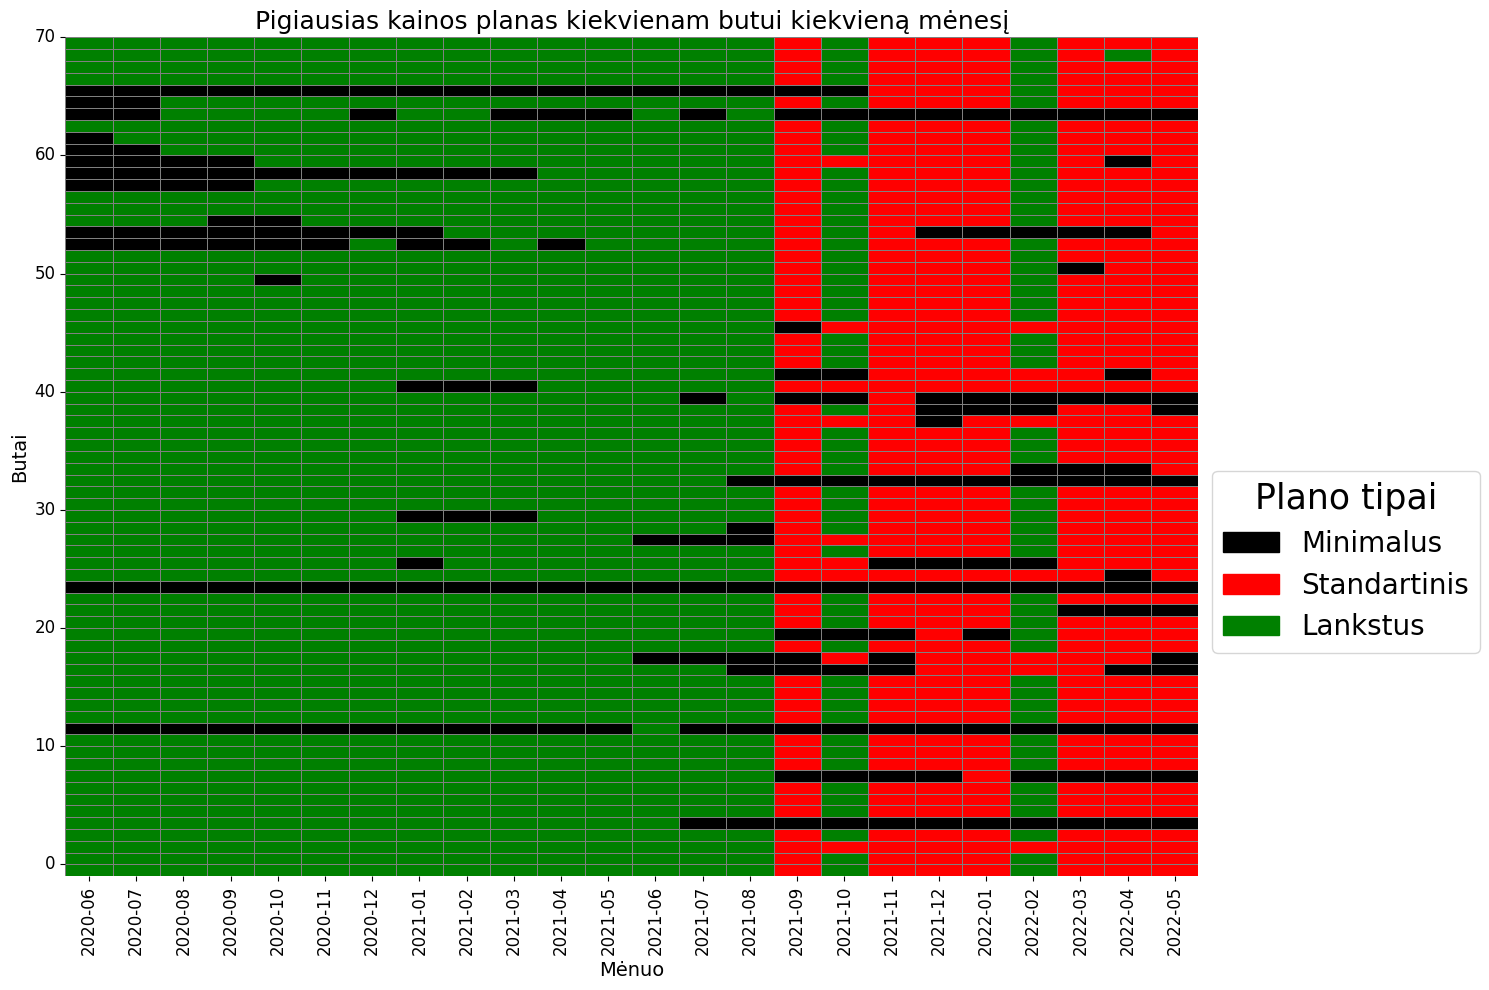

In [ ]:
# Sukuriame pivot lentelę, kurioje pateikiamas pigiausias planas kiekvienam butui per mėnesius
pivot_table = menesinis_suvartojimas.pivot_table(
    index='OBJ_NUMERIS',
    columns='Mėnuo',
    values='Plano_kodas' # 1: Minimalus, 2: Standartinis, 3: Lankstus
).fillna(0)

pivot_table.index = range(1, len(pivot_table.index) + 1) 
# Apverčia, kad būtų paskutiniai butai būtų viršuje
pivot_table = pivot_table.iloc[::-1]

ticks = list(range(0, len(pivot_table.index), 10))
 # Etiketės rodomos atvirkštine tvarka 70 iki 0, kad būtų kaip pateikta pavyzdyje
tick_labels = list(range(0, 71, 10))[::-1]

# Lentelės dydis
plt.figure(figsize=(15, 10))

# Vaizduojame pivot lentelę kaip šilumos žemėlapį (heatmap)
ax = sns.heatmap(
    pivot_table,
    cmap=sns.color_palette(["black", "red", "green"]),
    linewidths=0.5,
    linecolor="gray",
    cbar=False
)
# Pavadinimas ir ašių etiketes
plt.title("Pigiausias kainos planas kiekvienam butui kiekvieną mėnesį", fontsize=18)
plt.xlabel("Mėnuo", fontsize=14)
plt.ylabel("Butai", fontsize=14)

# Pasukamos x ašies etiketes
plt.xticks(rotation=90, fontsize=12)
plt.yticks(
    ticks,
    labels=tick_labels,
    rotation=0,
    fontsize=12
)
# Sukuriama legenda, paaiškinanti spalvas
legend_labels = [
    mpatches.Patch(color="black", label="Minimalus"),
    mpatches.Patch(color="red", label="Standartinis"),
    mpatches.Patch(color="green", label="Lankstus")
]
plt.legend(
    handles=legend_labels,
    title="Plano tipai",
    loc="upper left",
    bbox_to_anchor=(1, 0.5),
    fontsize=20,
    title_fontsize=25
)

plt.tight_layout()
plt.show()

Padariau kaip galėjau panašiau, matau kad šiektiek skiriasi nuo užduotyje pateikto, suprantu kad galbūt netaip kažkaip padariau lankstaus plano kainos paskaičiavimą arba kažkur suklydau tvarkydamas duomenų rinkinį. Nebežinau kaip padaryti, kad apskaičiuotų dar geriau.

In [ ]:
# Norodomi failų keliai, ir tie failai įsikeliami
butu_failas = r"C:\Users\Paulius\Duomenu mokslas\Duomenų analitikų užduotis\butu_duomenys.csv"
nordpool_failas = r"C:\Users\Paulius\Duomenu mokslas\Duomenų analitikų užduotis\nordpool_duomenys.csv"
butu_duomenys = pd.read_csv(butu_failas)
nordpool_duomenys = pd.read_csv(nordpool_failas)

butu_duomenys['PL_T'] = pd.to_datetime(butu_duomenys['PL_T'])
nordpool_duomenys['Laikas'] = pd.to_datetime(nordpool_duomenys['Laikas'])

# Ištraukiama tik mėnesio informaciją iš datų
butu_duomenys['Mėnuo'] = butu_duomenys['PL_T'].dt.to_period('M')
nordpool_duomenys['Mėnuo'] = nordpool_duomenys['Laikas'].dt.to_period('M')

menesinis_suvartojimas = butu_duomenys.groupby(['OBJ_NUMERIS', 'Mėnuo'])['P+'].sum().reset_index()

vidutines_kainos = nordpool_duomenys.groupby('Mėnuo')['Kaina'].mean().reset_index()

menesinis_suvartojimas = pd.merge(menesinis_suvartojimas, vidutines_kainos, on='Mėnuo', how='left')

menesinis_suvartojimas['Minimalus'] = 1.00 + 0.22 * menesinis_suvartojimas['P+']
menesinis_suvartojimas['Standartinis'] = 2.00 + 0.20 * menesinis_suvartojimas['P+']
menesinis_suvartojimas['Lankstus'] = (
    3.00 + 0.08 * menesinis_suvartojimas['P+'] + 
    (menesinis_suvartojimas['Kaina'] / 1000) * menesinis_suvartojimas['P+']
)
# Pigiausias planas kiekvienam mėnesiui
menesinis_suvartojimas['Pigiausias_planas'] = menesinis_suvartojimas[
    ['Minimalus', 'Standartinis', 'Lankstus']
].idxmin(axis=1)

galutine_lentele = menesinis_suvartojimas.pivot_table(
    index='OBJ_NUMERIS',
    columns='Mėnuo',
    values='Pigiausias_planas',
    aggfunc='first'
)
# Kiek mėnesių kiekvienam butui buvo tinkamiausias tam tikras planas
plano_skaiciavimas = menesinis_suvartojimas.groupby(['OBJ_NUMERIS', 'Pigiausias_planas']).size().unstack(fill_value=0)

# Sujungiamos lentelės
galutine_lentele = pd.concat([galutine_lentele, plano_skaiciavimas], axis=1)

# Surandame butą, kuriam dažniausiai buvo palankiausias "Minimalus" planas
minimalus_top = galutine_lentele.sort_values(by='Minimalus', ascending=False).head(1)
minimalus_butas = minimalus_top.index[0]

# Surandame butą, kuriam dažniausiai buvo palankiausias "Lankstus" planas
lankstus_top = galutine_lentele.sort_values(by='Lankstus', ascending=False).head(1)
lankstus_butas = lankstus_top.index[0]

print(f"Butas, kuriam dažniausiai palankiausias buvo 'Minimalus' planas: {minimalus_butas}")
print(f"Butas, kuriam dažniausiai palankiausias buvo 'Lankstus' planas: {lankstus_butas}")

Butas, kuriam dažniausiai palankiausias buvo 'Minimalus' planas: 569298
Butas, kuriam dažniausiai palankiausias buvo 'Lankstus' planas: 802542


Nurodykite butą (objekto numerį), kuriam dažniausiai palankiausias buvo "Minimalus" planas.

569298 butas

Nurodykite butą (objekto numerį), kuriam dažniausiai palankiausias buvo "Lankstus" planas.

802542 butas